In [1]:
# Import pkgs
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, make_scorer
from scipy.stats import skew

# To plot pretty pictures
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
train_data = "C:/Users/Scott/Data Science Projects/house-prices-advanced-regression-techniques/train.csv"
test_data = "C:/Users/Scott/Data Science Projects/house-prices-advanced-regression-techniques/test.csv"

In [3]:
train = pd.read_csv(train_data)
test = pd.read_csv(test_data)

In [4]:
train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [5]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
Id               1460 non-null int64
MSSubClass       1460 non-null int64
MSZoning         1460 non-null object
LotFrontage      1201 non-null float64
LotArea          1460 non-null int64
Street           1460 non-null object
Alley            91 non-null object
LotShape         1460 non-null object
LandContour      1460 non-null object
Utilities        1460 non-null object
LotConfig        1460 non-null object
LandSlope        1460 non-null object
Neighborhood     1460 non-null object
Condition1       1460 non-null object
Condition2       1460 non-null object
BldgType         1460 non-null object
HouseStyle       1460 non-null object
OverallQual      1460 non-null int64
OverallCond      1460 non-null int64
YearBuilt        1460 non-null int64
YearRemodAdd     1460 non-null int64
RoofStyle        1460 non-null object
RoofMatl         1460 non-null object
Exterior1st      1460 non-n

In [6]:
na_val = train.isna().sum().sort_values(ascending=False)
print(na_val.head(20))

PoolQC          1453
MiscFeature     1406
Alley           1369
Fence           1179
FireplaceQu      690
LotFrontage      259
GarageCond        81
GarageType        81
GarageYrBlt       81
GarageFinish      81
GarageQual        81
BsmtExposure      38
BsmtFinType2      38
BsmtFinType1      37
BsmtCond          37
BsmtQual          37
MasVnrArea         8
MasVnrType         8
Electrical         1
Utilities          0
dtype: int64


__NaN's Missing values__
Many of the 'null' values aren't null, they're NA. e.g. the data description states that for PoolQC NA = No Pool. Fence, NA = No Fence.
There are no blank cells to speak of. If we used listwise deletion for either PoolQC, MiscFeature, Alley, Fence, FireplaceQU we wouldn't have any data to compute. So, we can't do that. I'm  against just plugging in the mean, as so many people do by default to because it's easy (and lazy), although sometimes it is appropriate. <br>
The problem with that is it can distort the distribution of the data if there are too many missing values; for those columns that's a lot. The result is that the standard deviation would decrease. And we get biased values for the standard deviation, which is also not good.

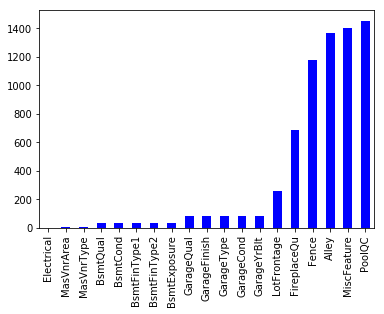

In [7]:
missing = na_val
missing = missing[missing > 0]
missing.sort_values(inplace=True)
missing.plot.bar(color = 'b')

In [8]:
train.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)
test.drop(['Id', 'PoolQC', 'MiscFeature', 'Alley', 'Fence', 'FireplaceQu'], axis=1, inplace=True)

In [9]:
na_val = train.isna().sum().sort_values(ascending=False)
print(na_val.head(20))

LotFrontage     259
GarageType       81
GarageYrBlt      81
GarageCond       81
GarageQual       81
GarageFinish     81
BsmtExposure     38
BsmtFinType2     38
BsmtFinType1     37
BsmtCond         37
BsmtQual         37
MasVnrArea        8
MasVnrType        8
Electrical        1
Exterior1st       0
RoofMatl          0
SalePrice         0
Exterior2nd       0
YearRemodAdd      0
ExterQual         0
dtype: int64


I recall that from the brief we are supposed to remove houses with sq.ft > 4,000.

In [10]:
train = train.loc[train['GrLivArea']<=4000,:]
test = test.loc[test['GrLivArea'] <=4000,:]

In [11]:
cor_mtx = train.corr()
cor_mtx.sort_values(["SalePrice"], ascending = False, inplace = True)
print(cor_mtx.SalePrice)

SalePrice        1.000000
OverallQual      0.800858
GrLivArea        0.720516
GarageCars       0.649256
TotalBsmtSF      0.646584
GarageArea       0.636964
1stFlrSF         0.625235
FullBath         0.559048
TotRmsAbvGrd     0.537462
YearBuilt        0.535279
YearRemodAdd     0.521428
GarageYrBlt      0.499230
MasVnrArea       0.478862
Fireplaces       0.466765
BsmtFinSF1       0.395923
LotFrontage      0.356773
OpenPorchSF      0.330361
WoodDeckSF       0.322538
2ndFlrSF         0.297301
HalfBath         0.282925
LotArea          0.269866
BsmtFullBath     0.235697
BsmtUnfSF        0.220678
BedroomAbvGr     0.160542
ScreenPorch      0.118324
MoSold           0.056797
3SsnPorch        0.047414
PoolArea         0.032819
BsmtFinSF2      -0.008900
MiscVal         -0.021097
YrSold          -0.023694
LowQualFinSF    -0.025351
BsmtHalfBath    -0.036792
OverallCond     -0.080202
MSSubClass      -0.088160
EnclosedPorch   -0.129774
KitchenAbvGr    -0.138849
Name: SalePrice, dtype: float64


In [12]:
train.shape

(1456, 75)

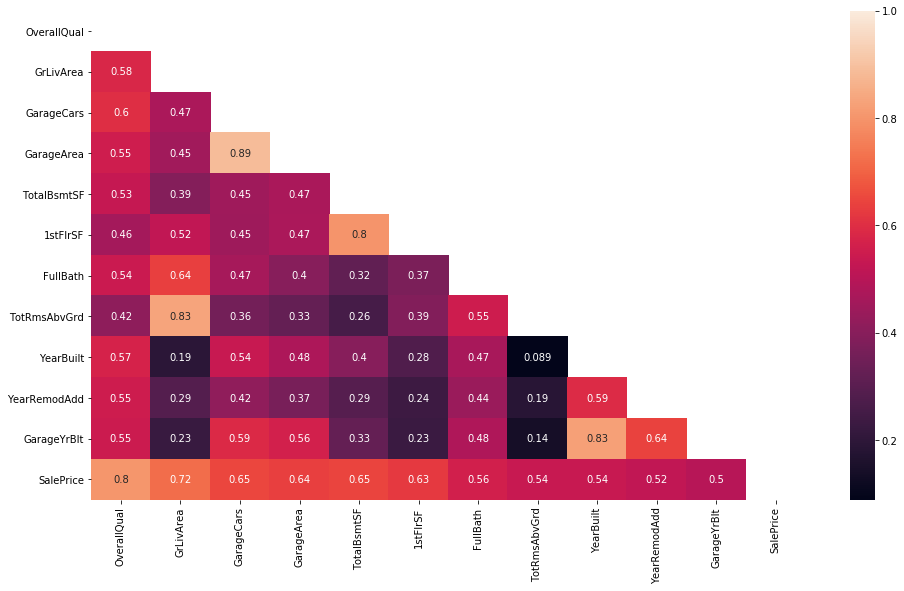

In [13]:
f, ax = plt.subplots(figsize=(16,9))
cor_mtx = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt', 'SalePrice']].corr()

# Mask for the upper triangle
mask = np.zeros_like(cor_mtx, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(cor_mtx, mask = mask, annot=True,
            xticklabels=cor_mtx.columns.values,
            yticklabels=cor_mtx.columns.values)

In [14]:
cor_mtx.shape

(12, 12)

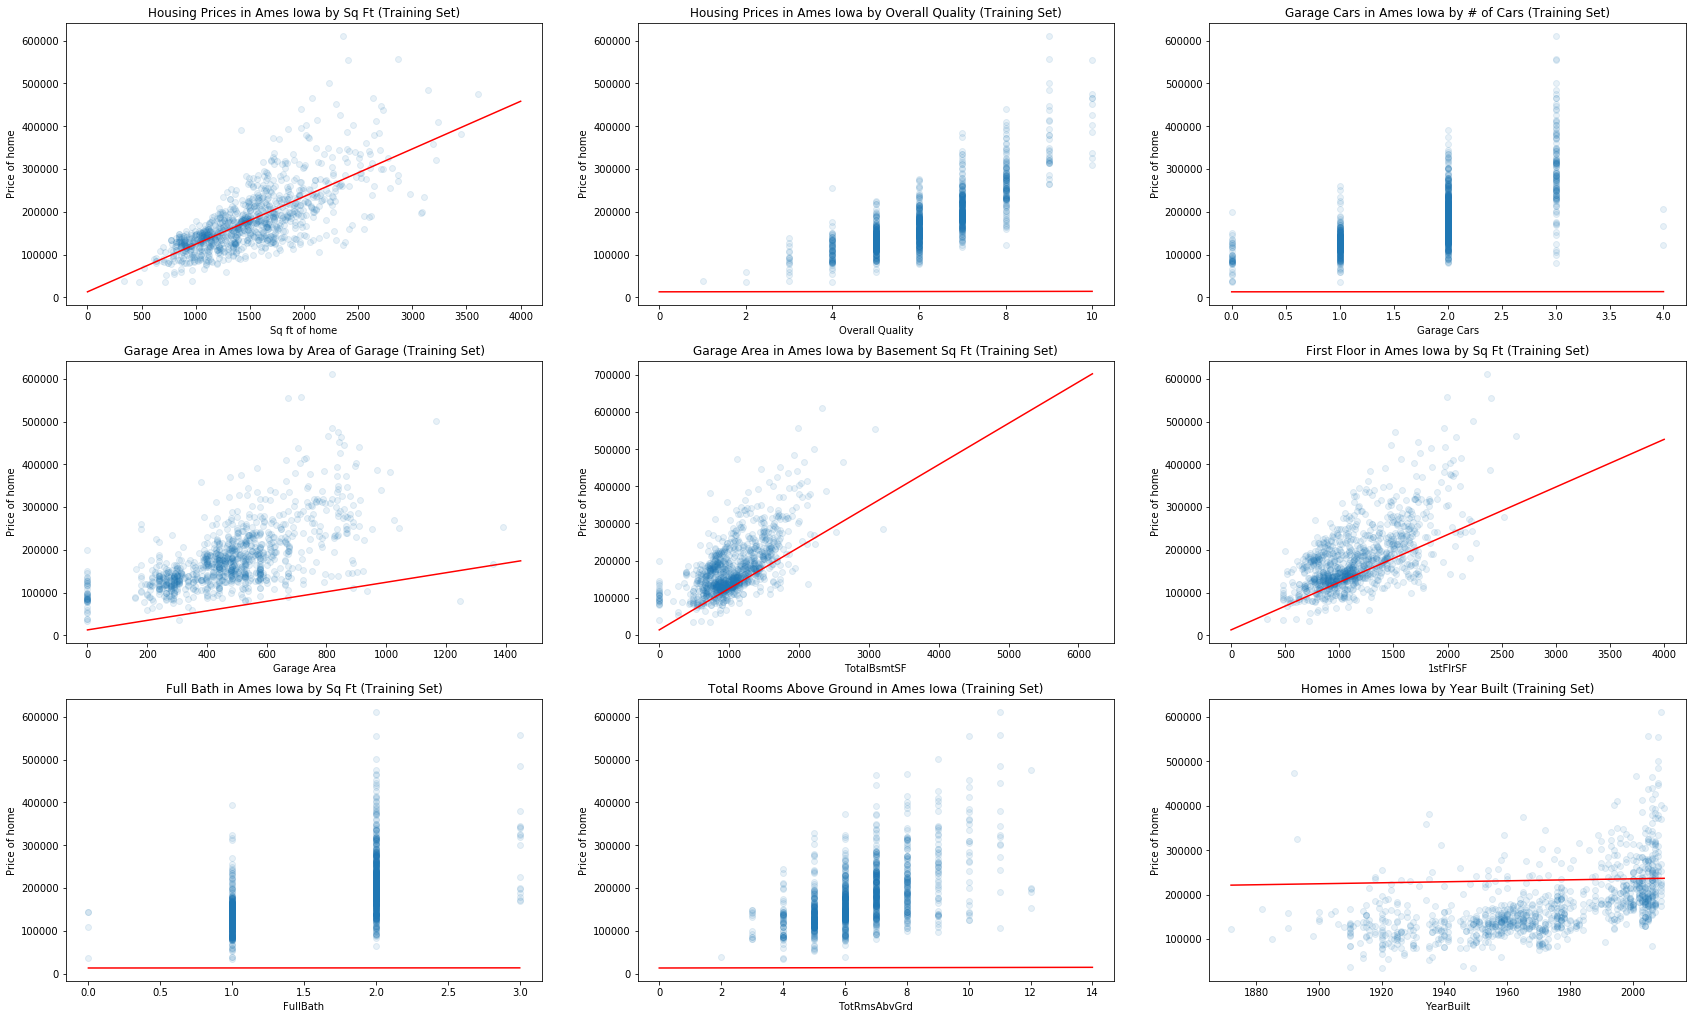

In [107]:
#Split the data 70-30 train/test
X = train[['OverallQual','GrLivArea','GarageCars','GarageArea','TotalBsmtSF','1stFlrSF','FullBath',
             'TotRmsAbvGrd', 'YearBuilt', 'YearRemodAdd', 'GarageYrBlt']]
y = train['SalePrice']

X = X
y = y
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

# Focus on top correlation
selected_column = ['GrLivArea']
selected_column2 = ['OverallQual']

# Define a `default` LinearRegression model and fit it to the data with just `Gr Liv Area' as the feature
# and SalePrice as the target.
lr_model1 = LinearRegression()
lr_model1.fit(X_train[selected_column],y_train)

plt.figure(figsize=(12,9))
#fig, axes = plt.subplots(nrows=4, ncols=3)
plt.subplots_adjust(left=None, bottom=.5, right=2, top=2.5, wspace=None, hspace=None)

plt.subplot(431)
plt.scatter(X_train['GrLivArea'],y_train,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Housing Prices in Ames Iowa by Sq Ft (Training Set)")
plt.xlabel("Sq ft of home")
plt.ylabel("Price of home");

plt.subplot(432)
plt.scatter(X_train['OverallQual'],y_train,alpha=.1)
vec1 = np.linspace(0,10,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Housing Prices in Ames Iowa by Overall Quality (Training Set)")
plt.xlabel("Overall Quality")
plt.ylabel("Price of home");

plt.subplot(433)
plt.scatter(X_train['GarageCars'],y_train,alpha=.1)
vec1 = np.linspace(0,4,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Garage Cars in Ames Iowa by # of Cars (Training Set)")
plt.xlabel("Garage Cars")
plt.ylabel("Price of home");

plt.subplot(434)
plt.scatter(X_train['GarageArea'],y_train,alpha=.1)
vec1 = np.linspace(0,1450,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Garage Area in Ames Iowa by Area of Garage (Training Set)")
plt.xlabel("Garage Area")
plt.ylabel("Price of home");

plt.subplot(435)
plt.scatter(X_train['TotalBsmtSF'],y_train,alpha=.1)
vec1 = np.linspace(0,6200,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Garage Area in Ames Iowa by Basement Sq Ft (Training Set)")
plt.xlabel("TotalBsmtSF")
plt.ylabel("Price of home");

plt.subplot(436)
plt.scatter(X_train['1stFlrSF'],y_train,alpha=.1)
vec1 = np.linspace(0,4000,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("First Floor in Ames Iowa by Sq Ft (Training Set)")
plt.xlabel("1stFlrSF")
plt.ylabel("Price of home");

plt.subplot(437)
plt.scatter(X_train['FullBath'],y_train,alpha=.1)
vec1 = np.linspace(0,3,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Full Bath in Ames Iowa by Sq Ft (Training Set)")
plt.xlabel("FullBath")
plt.ylabel("Price of home");

plt.subplot(438)
plt.scatter(X_train['TotRmsAbvGrd'],y_train,alpha=.1)
vec1 = np.linspace(0,14,1000)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Total Rooms Above Ground in Ames Iowa (Training Set)")
plt.xlabel("TotRmsAbvGrd")
plt.ylabel("Price of home");

plt.subplot(439)
plt.scatter(X_train['YearBuilt'],y_train,alpha=.1)
vec1 = np.linspace(1872,2010)
plt.plot(vec1, lr_model1.intercept_ + lr_model1.coef_[0]*vec1,'r')
plt.title("Homes in Ames Iowa by Year Built (Training Set)")
plt.xlabel("YearBuilt")
plt.ylabel("Price of home");

I suspect that due to the high correlation between Year Built and Garage Year Built, they're essentially the same year. <br> And a quick check in Excel confirms that (sorry, Excel is still handy for some stuff). So, I'll also delete 'GarageYrBuilt' column.

In [108]:
train.drop(['GarageYrBlt'], axis=1, inplace=True)
test.drop(['GarageYrBlt'], axis=1, inplace=True)

In [109]:
# All features w/o NaN's

train_columns = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                 "TotRmsAbvGrd","YearBuilt","YearRemodAdd","Fireplaces", "BsmtFinSF1",
                 "OpenPorchSF", "WoodDeckSF","2ndFlrSF", "HalfBath", "LotArea","BsmtFullBath",
                 "BsmtUnfSF", "BedroomAbvGr", "ScreenPorch", "MoSold","3SsnPorch"]

train_features = train_columns[:-1]
train_target = train_columns[-1]

#standardize the features, to get actual interpretable coefficients for each feature
X = StandardScaler().fit_transform(train[train_features].astype(float))
y = train[train_target]

lr = LinearRegression()

#must take absolute value because sklearn makes the errors negative - dont ask me why
mean_squared_errors = np.abs(cross_val_score(lr,X,y,cv=50,scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  19.40209100398876


In [122]:
# Only features in .corr()

train_columns = ["OverallQual","GrLivArea","GarageCars","GarageArea","TotalBsmtSF","1stFlrSF","FullBath",
                 "TotRmsAbvGrd","YearBuilt","YearRemodAdd","Fireplaces", "BsmtFinSF1", "OpenPorchSF", "WoodDeckSF",
                "2ndFlrSF", "HalfBath", "LotArea", "BsmtFullBath","BsmtUnfSF", "BedroomAbvGr"]

train_features = train_columns[:-1]
train_target = train_columns[-1]

#standardize the features, to get actual interpretable coefficients for each feature
X = StandardScaler().fit_transform(train[train_features].astype(float))
y = train[train_target]

lr = LinearRegression()

#must take absolute value because sklearn makes the errors negative - dont ask me why
mean_squared_errors = np.abs(cross_val_score(lr,X,y,cv=50,scoring='neg_mean_squared_error'))
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))

50-fold mean RMSE:  0.5536862156553234


In [123]:
coeffs = LinearRegression().fit(X,y).coef_
coeff_df = pd.DataFrame(list(zip(train_features,np.abs(coeffs))),columns=["features","betas"])
coeff_df.sort_values("betas",ascending=False,inplace=True)
coeff_df

,features,betas
7,TotRmsAbvGrd,0.524487
14,2ndFlrSF,0.212530
0,OverallQual,0.146166
9,YearRemodAdd,0.099169
4,TotalBsmtSF,0.094990
6,FullBath,0.074731
1,GrLivArea,0.062366
10,Fireplaces,0.056418
2,GarageCars,0.044665
5,1stFlrSF,0.041212


In [126]:
from sklearn.preprocessing import PolynomialFeatures
#generate the transformer
pf_2 = PolynomialFeatures(degree=2,interaction_only=True)
#apply it to the data, but ignore the first constant column
pf_2_data = pf_2.fit_transform(train[train_features])[:,1:]#ignore constant column
print(pf_2_data.shape)
lr = LinearRegression()
#get the mean squared errors per fold, 10 fold cv
absolute_errors = np.abs(cross_val_score(lr,pf_2_data,train[train_target],cv=50))
#convert each fold's mean squared errors to rmse
rmses = list(map(np.sqrt,absolute_errors))
print("50-fold mean RMSE for degree-2 case: ",np.mean(rmses))

(1456, 190)
10-fold mean RMSE for degree-2 case:  0.7404542420189719


# Lasso

In [130]:
from sklearn.linear_model import Lasso, Ridge

lasso = Lasso(max_iter=10000)#increase the number of iterations for lasso to prevent lack of convergence
mean_squared_errors_poly2_lasso = np.abs(cross_val_score(lasso,pf_2_data,train[train_target],cv=10))
rmses_lasso_poly2 = list(map(np.sqrt,mean_squared_errors_poly2_lasso))
print("10-fold mean RMSE for degree-2 case, strongest lasso regularization: ",np.mean(rmses_lasso_poly2))

C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increa

10-fold mean RMSE for degree-2 case, strongest lasso regularization:  0.7476736821415295


C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\coordinate_descent.py:492: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


# Ridge

In [132]:
ridge = Ridge()
ridge_cv_squared_errors = np.abs(cross_val_score(ridge,pf_2_data,train[train_target],cv=10))
rmse_ridge_cv = list(map(np.sqrt,ridge_cv_squared_errors))
print("10-fold mean RMSE for degree-2 case, strongest lasso regularization: ",np.mean(rmse_ridge_cv))

C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.67127e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=3.1083e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=4.70565e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.73236e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.84968e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ri

10-fold mean RMSE for degree-2 case, strongest lasso regularization:  1.3713608995045328


C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.64572e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.71058e-19): result may not be accurate.
  overwrite_a=True).T
C:\Users\Scott\Anaconda3\lib\site-packages\sklearn\linear_model\ridge.py:125: LinAlgWarning: Ill-conditioned matrix (rcond=2.67495e-19): result may not be accurate.
  overwrite_a=True).T


## PCA

   OverallQual  GrLivArea  GarageCars  GarageArea  TotalBsmtSF  1stFlrSF  \
0            7       1710           2         548          856       856   
1            6       1262           2         460         1262      1262   
2            7       1786           2         608          920       920   
3            7       1717           3         642          756       961   
4            8       2198           3         836         1145      1145   

   FullBath  TotRmsAbvGrd  YearBuilt  YearRemodAdd  Fireplaces  BsmtFinSF1  \
0         2             8       2003          2003           0         706   
1         2             6       1976          1976           1         978   
2         2             6       2001          2002           1         486   
3         1             7       1915          1970           1         216   
4         2             9       2000          2000           1         655   

   OpenPorchSF  WoodDeckSF  2ndFlrSF  HalfBath  LotArea  BsmtFullBath  \
0

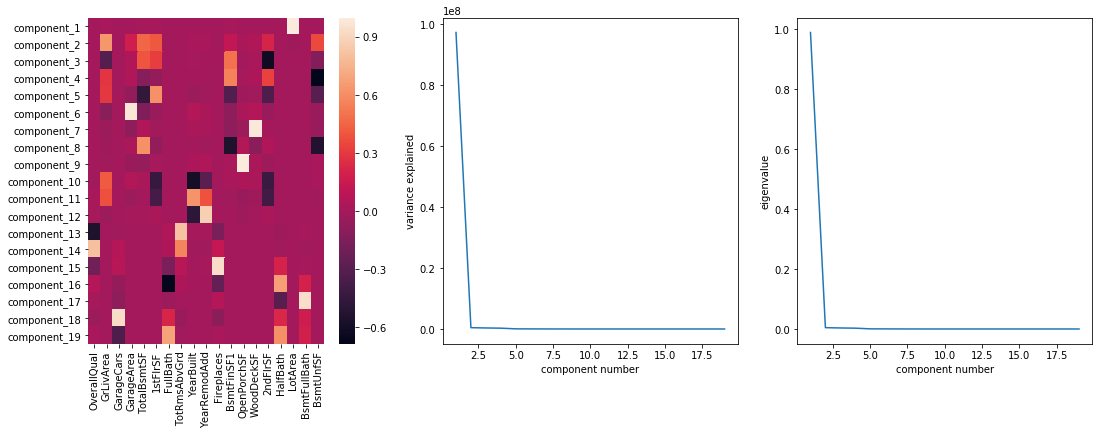

In [138]:
from sklearn.decomposition import PCA

pca = PCA()
transformed_pca_x = pca.fit_transform(train[train_features])
#create component indices
component_names = ["component_"+str(comp) for comp in range(1, len(pca.explained_variance_)+1)]

#generate new component dataframe
transformed_pca_x = pd.DataFrame(transformed_pca_x,columns=component_names)
print(train[train_features].head())
transformed_pca_x.head()

#generate component loadings on original features
component_matrix = pd.DataFrame(pca.components_,index=component_names,columns = train_features)
#add additional columns to describe what
component_matrix["explained_variance_ratio"] = pca.explained_variance_ratio_
component_matrix["eigenvalue"] = pca.explained_variance_
figure = sns.mpl.pyplot.figure(figsize=(18,6))
#add 3 subplots one at a time

#first the component matrix
figure.add_subplot(131)
sns.heatmap(component_matrix.iloc[:,:-2])

#then the eigenvalues
figure.add_subplot(132)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1), component_matrix.eigenvalue)
sns.mpl.pyplot.xlabel("component number")
sns.mpl.pyplot.ylabel("variance explained")

#then the explained variance ratio
figure.add_subplot(133)
sns.mpl.pyplot.plot(range(1,component_matrix.shape[0]+1), component_matrix.explained_variance_ratio)
sns.mpl.pyplot.xlabel("component number")
sns.mpl.pyplot.ylabel("eigenvalue");

In [135]:
component_matrix.explained_variance_ratio.cumsum()

component_1     0.988344
component_2     0.992790
component_3     0.996192
component_4     0.998944
component_5     0.999418
component_6     0.999720
component_7     0.999862
component_8     0.999944
component_9     0.999983
component_10    0.999991
component_11    0.999998
component_12    1.000000
component_13    1.000000
component_14    1.000000
component_15    1.000000
component_16    1.000000
component_17    1.000000
component_18    1.000000
component_19    1.000000
Name: explained_variance_ratio, dtype: float64

In [141]:
mean_squared_errors = np.abs(cross_val_score(lr,transformed_pca_x.iloc[:,:11],y,cv=50,scoring='neg_mean_squared_error'))
#apply square root to each fold
root_mean_squared_errors = list(map(np.sqrt,mean_squared_errors))
print("50-fold mean RMSE: ", np.mean(root_mean_squared_errors))
print("50-fold std RMSE: ", np.std(root_mean_squared_errors))

50-fold mean RMSE:  0.6405762717046415
50-fold std RMSE:  0.1117134402210403


Close, but still not as good as including all 20 features.

## Feature Engineering

For the other features that have NA's, just take them one-at-a-time. So, let's see how many categorical and numerical columns we're dealing with.

In [204]:
cat_obj=train.select_dtypes(include='object')
cat_obj.shape, cat_obj.columns

((1456, 38),
 Index(['MSZoning', 'Street', 'LotShape', 'LandContour', 'Utilities',
        'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2',
        'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st',
        'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond', 'Foundation',
        'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinType2',
        'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 'KitchenQual',
        'Functional', 'GarageType', 'GarageFinish', 'GarageQual', 'GarageCond',
        'PavedDrive', 'SaleType', 'SaleCondition'],
       dtype='object'))

In [205]:
cat_num=train.select_dtypes(include='number')
cat_num.shape, cat_num.columns

((1456, 36),
 Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
        'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
        'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF', 'LowQualFinSF',
        'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 'HalfBath',
        'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces',
        'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
        'EnclosedPorch', '3SsnPorch', 'ScreenPorch', 'PoolArea', 'MiscVal',
        'MoSold', 'YrSold', 'SalePrice'],
       dtype='object'))